<a href="https://colab.research.google.com/github/neerajthandayan/CourseProject/blob/main/Notebooks/PFAEthnic_Diversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Calculating Ethinic Diversity in Different Police Force Areas

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd

In [ ]:
# Loading Data

data = pd.read_csv('/content/drive/MyDrive/Project Data/Arrest_data.csv',header=0)
data.head(2)

,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Gender,Gender_type,Age_Group,Age_Group_type,Geography,Geography_type,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)",Notes
0,Number of arrests,2018/19,Financial year,All,All,All,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,"60,208",N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...
1,Number of arrests,2018/19,Financial year,All,All,Female,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,"9,290",N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...


In [ ]:
data.columns 

Index(['Measure', 'Time', 'Time_type', 'Ethnicity', 'Ethnicity_type', 'Gender',
       'Gender_type', 'Age_Group', 'Age_Group_type', 'Geography',
       'Geography_type', 'Number of arrests',
       'Population by ethnicity, gender, and PFA (based on 2011 Census)',
       'Rate per 1,000 population by ethnicity, gender, and PFA',
       'Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)',
       'Notes'],
      dtype='object')

In [ ]:
data['Ethnicity_type'].unique()

array(['All', 'ONS 2001 16+1', 'ONS 2001 5+1', 'Unreported'], dtype=object)

In [ ]:
# Dropping unnecessary columns 

data.drop(columns=['Measure','Time_type','Rate per 1,000 population by ethnicity, gender, and PFA','Geography_type','Number of arrests','Gender_type','Age_Group_type',
                   'Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)',
                   'Notes'], inplace=True)

In [ ]:
# Slicing Data  and renaming columns

ndata = data.loc[data['Age_Group'] == "All"]
ndata = ndata.loc[data['Gender'] == "All"]
ndata = ndata.loc[data['Ethnicity_type'] == "ONS 2001 5+1"]
ndata = ndata.loc[data['Time'] == "2018/19"]
ndata = ndata.loc[data['Geography'] != "All"]
newdata = ndata.drop(columns=['Time','Ethnicity_type','Gender','Age_Group']).copy()
newdata.rename(columns={'Population by ethnicity, gender, and PFA (based on 2011 Census)':'Population'},inplace=True)

# Droping NaN Values

newdata.dropna(inplace=True)

# Resetting Index

newdata.reset_index(inplace=True, drop=True)

In [ ]:
newdata.loc[newdata['Geography'] == 'London, City of']

,Ethnicity,Geography,Population


In [ ]:
# Cleaning Population Data

c = newdata['Population'].copy()

for i in range(len(c)):
  if type(c.iloc[i]) == str:
    c.iloc[i] = c.iloc[i].replace(',','')
    c.iloc[i]= pd.to_numeric(c.iloc[i])
  else:
    continue

newdata['Population'] = c

In [ ]:
# Creating Geography Object

PFA = newdata['Geography'].unique()
PFA

array(['Avon and Somerset', 'Bedfordshire', 'Cambridgeshire', 'Cheshire',
       'Cleveland', 'Cumbria', 'Derbyshire', 'Devon and Cornwall',
       'Dorset', 'Durham', 'Dyfed-Powys', 'Essex', 'Gloucestershire',
       'Greater Manchester', 'Gwent', 'Hampshire', 'Hertfordshire',
       'Humberside', 'Kent', 'Lancashire', 'Leicestershire',
       'Lincolnshire', 'Merseyside', 'Metropolitan Police', 'Norfolk',
       'North Wales', 'North Yorkshire', 'Northamptonshire',
       'Northumbria', 'Nottinghamshire', 'South Wales', 'South Yorkshire',
       'Staffordshire', 'Suffolk', 'Surrey', 'Sussex', 'Thames Valley',
       'Warwickshire', 'West Mercia', 'West Midlands', 'West Yorkshire',
       'Wiltshire'], dtype=object)

## Calculating Ethinic Diversity

#### Here, we calculate ethnic diversity using ethno-linguistic fractionlization index (ELF)
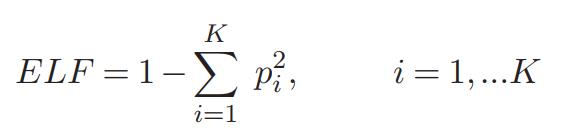

In [ ]:
# Populating Relative Population Data and Squared Relative Population

u = []

for i in PFA:
  a = newdata.loc[newdata['Geography'] == i].copy()
  a['rel_pop'] = (a['Population']/a['Population'].sum())
  for x in a['rel_pop']:
    u.append(x)

newdata['rel_pop'] = u
newdata['rl_sq'] = np.square(newdata['rel_pop'].values)

In [ ]:
# Calculating Diversity Score using EFL

Ethnic_Diversity = []

for q in PFA:
  Ethnic_Diversity.append(1 - newdata.loc[newdata['Geography'] == q]['rl_sq'].sum())

In [ ]:
# Creating DataFrame for Ethnic Diversity

mydict = {'Geography': PFA, 'Diversity_Score': Ethnic_Diversity}
fdata = pd.DataFrame.from_dict(mydict)
fdata.sort_values(by='Diversity_Score', ascending=False)

,Geography,Diversity_Score
23,Metropolitan Police,0.591174
39,West Midlands,0.470249
1,Bedfordshire,0.378451
20,Leicestershire,0.360843
40,West Yorkshire,0.314679
13,Greater Manchester,0.287564
36,Thames Valley,0.275782
16,Hertfordshire,0.228006
29,Nottinghamshire,0.207439
2,Cambridgeshire,0.181917


In [ ]:
# Saving Ethinic Diversity CSV

fdata.to_csv('ethnic_diversity.csv')

## Creating Population Dataset

In [ ]:
popdata = newdata.drop(columns=['rel_pop','rl_sq']).copy()

In [ ]:
popdata = popdata.pivot(columns='Ethnicity',index='Geography')
popdata.columns = popdata.columns.droplevel(0)
popdata = popdata.reset_index().copy()

In [ ]:
popdata = popdata[['Geography','White','Black','Asian','Other','Mixed']]
popdata.to_csv('pop_data.csv')
popdata

Ethnicity,Geography,White,Black,Asian,Other,Mixed
0,Avon and Somerset,1491970,30923,33005,15380,28277
1,Bedfordshire,476647,29725,81480,8753,18456
2,Cambridgeshire,726531,10174,39535,12572,16029
3,Cheshire,995998,3264,12794,5230,10423
4,Cleveland,526456,3156,17419,4434,5762
5,Cumbria,492257,579,2913,1605,2504
6,Derbyshire,949845,10090,36871,7281,14351
7,Devon and Cornwall,1627306,4106,11694,9467,15645
8,Dorset,714637,3208,10694,5995,9507
9,Durham,605364,1058,5114,3030,4240
